In [8]:
import math
import numpy as np
import pandas  as pd
from matplotlib import pyplot as plt
import scipy.stats as st 
import random

## DISTRIBUCIÓN BINOMIAL

Una distribución binomial es una distribución de probabilidad discreta que describe el número de éxitos al realizar n experimentos independientes entre sí, acerca de una variable aleatoria.

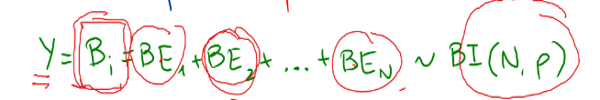

In [9]:
from PIL import Image
i = Image.open("binomial.png")
width, height = i.size
i = i.resize((600,100))
display(i)

In [65]:
def binomial(p, n, data):
    x = []
    r1 = []
    r2 = []
    r3 = []
    r4 = []
    r5 = []
    for i in range(n):
        con = 0
        aux = 1
        for j in range((5)):
            aleatorio = random.choice(data)
            data.remove(aleatorio)
            
            if(aux == 1): r1.append(aleatorio)
            if(aux == 2): r2.append(aleatorio)
            if(aux == 3): r3.append(aleatorio)
            if(aux == 4): r4.append(aleatorio)
            if(aux == 5): r5.append(aleatorio)
            
            if(aleatorio >= p):
                con = con + 1
            aux += 1
        x.append(con)
    return x, r1, r2, r3, r4, r5

## GENERACIÓN DE NÚMEROS ALEATORIOS

###  Algoritmos congruencial cuadrático

Es un algoritmo congruencial no lineal que tiene la siguiente ecuación recursiva:

> $X_{i+1}=(aX_i^2+bX_i+c)mod(m) \hspace{1cm} i=0,1,2,3,...N$

En este caso, los números $r_i$ pueden ser generados con la ecuación:

> $r_i=\frac{X_i}{m−1} \hspace{1cm} i=0,1,2,3,...,n$

De acuerdo con L'Ecuyer, las condiciones que deben cumplir los parámetros $m,a,b,c$ para alcanzar un periodo máximo de $N=m$ son:

> $m=2^g$

> $a$ debe ser número par

> $c$ debe ser número impar

> $g$ debe ser entero

> $(b-1)mod4=1$.

Números pseudoaleatorios generados a través del tiempo:


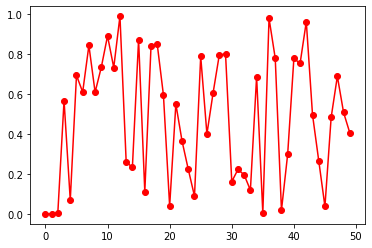

[0.0, 0.0001, 0.0066, 0.5684, 0.0688, 0.6943, 0.611, 0.8444, 0.6099, 0.7356, 0.8921, 0.7336, 0.9908, 0.2618, 0.2328, 0.8738, 0.1109, 0.8405, 0.8508, 0.5958, 0.0391, 0.5507, 0.3647, 0.2233, 0.0889, 0.7896, 0.4004, 0.6077, 0.7984, 0.8008, 0.1619, 0.2231, 0.1954, 0.1194, 0.6881, 0.0041, 0.9805, 0.7803, 0.0183, 0.2989, 0.7793, 0.7543, 0.9635, 0.4972, 0.2674, 0.0374, 0.4836, 0.6899, 0.5085, 0.4066]


In [66]:
n = 10

def algoritmo_cuadratico(semilla,a,b,c,m):
  entero = (a*semilla**2+b*semilla+c)%m
  r = entero/(m-1)
  return r,entero

cantidad = n * 5
semilla = 3
pseudoaleatorios = []
for i in range(cantidad):
  r,semilla = algoritmo_cuadratico(semilla,a=1,b=0,c=0,m=991*997)
  pseudoaleatorios.append(round(r,4))

df = pd.DataFrame({'column':pseudoaleatorios}) 
df.to_csv('lab_01_algoritmo_blum_blum.csv', index=False, header=['aleatorio'],sep=';',decimal='.')
df.to_csv('lab_01_algoritmo_blum_blum.txt', index=False, header=['aleatorio'],sep=';',decimal='.')

print("Números pseudoaleatorios generados a través del tiempo:")
plt.plot(range(cantidad),pseudoaleatorios, marker="o", color="red")
plt.show()
print(pseudoaleatorios)

# PRUEBAS DE UNIFORMIDAD

## Prueba de Chi-cuadrada.

Busca determinar si los números del conjunto $r_i$ se distribuyen de manera uniforme en el intervalo (0,1). Es necesario dividir el intervalo (0,1) en $m$ sub-intervalos, en donde es recomendable $m=\sqrt{n}$. Luego se clasifica cada número cada número pseudoaleatorio $r_i$ en los $m$ intervalos. Donde $O_i$ es la frecuencia observada y $E_i$ es la frecuencia esperada. $E_i$ es teóricamente igual a $n/m$.

> $\mathcal{X}_0^2=\sum_{i=1}^{m}\frac{(E_i-O_i)^2}{E_i}$

Si el valor estadístico $\mathcal{X}_0^2$ es menor al valor de tablas de $\mathcal{X}_{\alpha,m-1}^2$, entonces no se puede rechazar que el conjunto de numeros $r_i$ sigue una distribución uniforme. En caso contrario, se rechaza que $r_i$ sigue una distribución uniforme.

In [67]:
def prueba_chi_cuadrada(datos):
  n = len(datos)
  m = int(n**0.5)
  intervalo = 1/m
  frec_esperada = np.ones(m)*(n/m)
  frec_observada = np.zeros(m)
  for pseudoaleatorio in datos:
    posicion = int(pseudoaleatorio/intervalo) if pseudoaleatorio!=1 else m-1
    frec_observada[posicion] += 1
  return ((frec_esperada-frec_observada)**2/frec_esperada).sum()

datos = np.array(pseudoaleatorios)
print("El estadístico chi-cuadrada es: ",prueba_chi_cuadrada(datos))
a = 0.05
print("Tabla", st.chi2.ppf( 1 - (a/2), int(len(datos)**0.5) - 1))

El estadístico chi-cuadrada es:  6.839999999999999
Tabla 14.44937533544792


El estadístico $\mathcal{X}_0^2=\sum_{i=1}^{m}\frac{(E_i-O_i)^2}{E_i}=6.83999$ es menor al estadístico correspondiente de la Chi-cuadrada $\mathcal{X}_{0.025,6}^2=14.4493$. En consecuencia, no se puede rechazar que los números $r_i$ siguen una distribución uniforme.

# Pruebas de independencia

## Prueba de corridas arriba y abajo

El procedimiento de esta prueba consiste en determinar una secuencia de números ($S$) que solo contienen unos y ceros, de acuerdo con la comparación entre $r_i$ y $r_{i-1}$ (cero si el número $r_i$ es menor que $r_{i-1}$, caso contrario uno). Después se determina el número de corridas observadas, $C_O$ (cantidad de unos o ceros consecutivos). Luego se calcula el valor esperado, la varianza del número de corridas y el estadístico $Z_0$ mediante las ecucaciones:

> $\mu_{C_O} = \frac{2n-1}{3}$

> $\sigma_{C_O}^2=\frac{16n-29}{90}$3

> $Z_0 = \lvert \frac{C_O - \mu_{C_O}}{\sigma_{C_O}} \rvert$

Si el estadístico $Z_0$ es mayor que el valor crítico $Z_{\alpha,2}$, se concluye que los números del conjunto $r_i$ no son independientes. De lo contrario no se puede rechazar que el conjunto de $r_i$ sea independiente.

In [68]:
data = np.array(pseudoaleatorios)
num = len(data)
s = np.floor(np.diff(data) + 1).astype(int) #diff encuentra la diferencia entre numeros consecutivos, diff[0 1 2] = [1 1], floor y +1 son artificio para cumplir la condicion de s
compresion = [valor for indice,valor in enumerate(s) if indice == 0 or valor != s[indice-1]] #crea un array sin valores consecutivos repetidos, [1 2 2 3] -> [1 2 3]
corridas = len(compresion)
media = (2*num-1)/3
varianza = (16*num-29)/90
Z_0 = abs((corridas-media)/varianza**0.5)
print("El estadístico Z_0 es: ", Z_0)

El estadístico Z_0 es:  0.34165994425704577


Como el estadístico $Z_0 = 0.34165$ es menor que el valor de la tabla de la normal estándar para $Z_{\alpha,2}=Z_{5\%,2}=1.96$, se concluye que no se puede rechazar que los números del conjunto $r_i$ son independientes.

In [86]:
p = 0.90

x = []
r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
x, r1, r2, r3, r4, r5 = binomial(p, n, pseudoaleatorios.copy())
print(x)

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]


In [84]:
y = []
for i in range(n):
    y.append(i+1)

sep = '|{}|{}|{}|{}|{}|{}|{}|'.format('-'*10,'-'*10, '-'*10, '-'*10, '-'*10, '-'*10, '-'*10)
print('{0}\n|   LOTE   |    r1    |    r2    |    r3    |     r4   |     r5   |   PIEZA  | \n{0}'.format(sep))
for pos , cal, cal2, cal3, cal4, cal5, x in zip(y, r1, r2, r3 , r4, r5, x):
    print('| {:>8.0f} | {:>8.4f} | {:>8.4f} | {:>8.4f} | {:>8.4f} | {:>8.4f} |  {:>8.0f}| \n{}'.format(pos,cal, cal2, cal3, cal4, cal5, x,  sep))

|----------|----------|----------|----------|----------|----------|----------|
|   LOTE   |    r1    |    r2    |    r3    |     r4   |     r5   |   PIEZA  | 
|----------|----------|----------|----------|----------|----------|----------|
|        1 |   0.7793 |   0.5085 |   0.0889 |   0.4836 |   0.8921 |         0| 
|----------|----------|----------|----------|----------|----------|----------|
|        2 |   0.0374 |   0.2618 |   0.5958 |   0.0688 |   0.9635 |         1| 
|----------|----------|----------|----------|----------|----------|----------|
|        3 |   0.7336 |   0.9908 |   0.3647 |   0.5507 |   0.9805 |         2| 
|----------|----------|----------|----------|----------|----------|----------|
|        4 |   0.6881 |   0.6099 |   0.7803 |   0.5684 |   0.0001 |         0| 
|----------|----------|----------|----------|----------|----------|----------|
|        5 |   0.1619 |   0.7543 |   0.4004 |   0.1954 |   0.8508 |         0| 
|----------|----------|----------|----------|-